### 1. Install and Import Dependencies

In [1]:
!sudo apt-get install libkrb5-dev -q

Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
0 upgraded, 7 newly installed, 0 to remove and 5 not upgraded.
Need to get 349 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.2 [54.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.2 [37.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd6

In [2]:
!pip install arcgis==1.8.4 torch==1.4.0 fastai==1.0.60 torchvision==0.5.0 -q

     |████████████████████████████████| 2.7 MB 35.5 MB/s 
     |████████████████████████████████| 753.4 MB 21 kB/s 
     |████████████████████████████████| 237 kB 78.5 MB/s 
     |████████████████████████████████| 4.0 MB 65.4 MB/s 
     |████████████████████████████████| 355 kB 75.1 MB/s 
     |████████████████████████████████| 346 kB 68.7 MB/s 
     |████████████████████████████████| 346 kB 18.4 MB/s 
     |████████████████████████████████| 346 kB 7.3 MB/s 
     |████████████████████████████████| 346 kB 70.0 MB/s 
     |████████████████████████████████| 346 kB 82.6 MB/s 
     |████████████████████████████████| 346 kB 84.9 MB/s 
     |████████████████████████████████| 344 kB 9.7 MB/s 
     |████████████████████████████████| 344 kB 80.2 MB/s 
     |████████████████████████████████| 344 kB 84.9 MB/s 
     |████████████████████████████████| 342 kB 79.7 MB/s 
     |████████████████████████████████| 343 kB 77.3 MB/s 
     |████████████████████████████████| 8.8 MB 21.5 MB/s 
     |██████████

In [3]:
import os
from pathlib import Path

import arcgis
from arcgis.gis import GIS
from arcgis.learn import prepare_data

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 2. Prepare Data

In [5]:
filepath = '/content/gdrive/MyDrive/extracting_building_footprints_from_drone_data.zip'

In [6]:
import zipfile
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [7]:
data_path = Path(os.path.join(os.path.splitext(filepath)[0]))

In [8]:
# Prepare Data
data = prepare_data(path=data_path,
                    chip_size=400, 
                    batch_size=8)

### 3. Visualise a few samples from your Training data

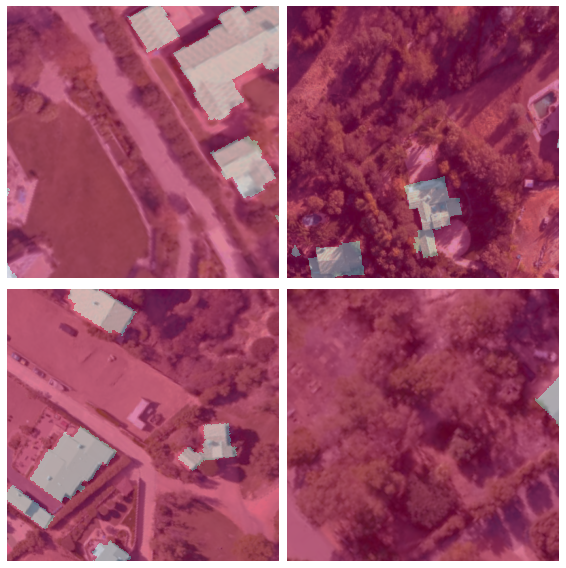

In [9]:
data.show_batch(rows=2, alpha=0.7)

### 4. Load an UnetClassifier model

In [10]:
# Create Unet Model
model = arcgis.learn.models.UnetClassifier(data)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

### 5. Find an Optimal Learning Rate

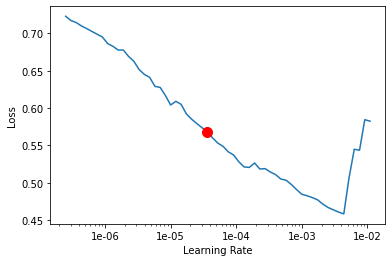

3.630780547701014e-05

In [11]:
# Find Learning Rate
model.lr_find()

### 6. Fit the model


In [12]:
# Training
model.fit(30, lr=slice(0.0001, 0.001))

epoch,train_loss,valid_loss,accuracy,dice,time
0,0.287699,0.230710,0.903385,0.903385,00:53
1,0.230748,0.284242,0.898365,0.898365,00:50
2,0.217547,0.202393,0.910399,0.910399,00:49
3,0.194560,0.165154,0.928860,0.928860,00:49
4,0.184054,0.199067,0.924411,0.924411,00:49
5,0.217427,0.340260,0.884020,0.884020,00:49
6,0.199993,0.160564,0.931626,0.931626,00:49
7,0.178075,0.186322,0.928006,0.928006,00:48
8,0.221975,0.168497,0.929544,0.929544,00:48
9,0.188514,0.164984,0.933858,0.933858,00:48


### 7. Save the model


In [13]:
# Save model to file
model.save('30e')

Computing model metrics...


PosixPath('/content/gdrive/MyDrive/extracting_building_footprints_from_drone_data/models/30e')

### 8. Preview Results

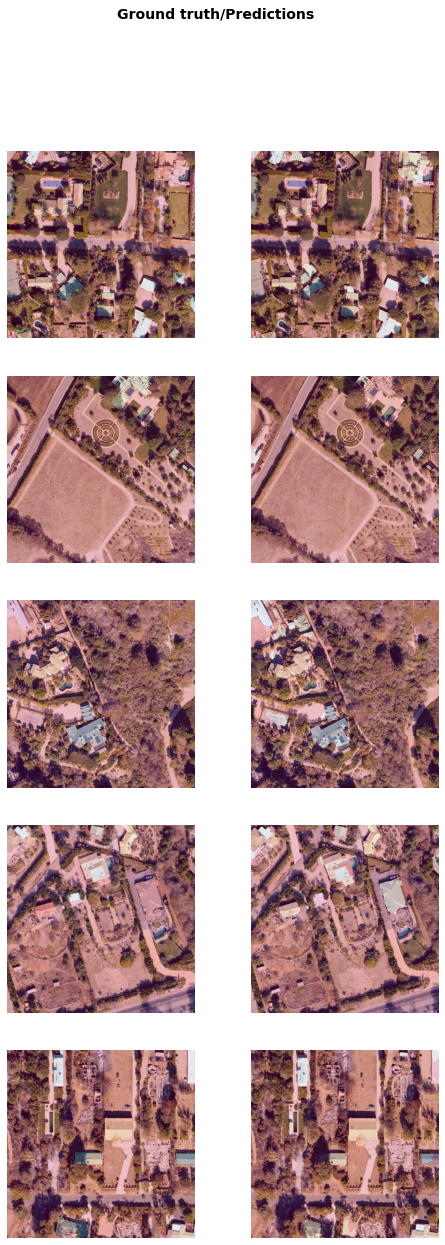

In [14]:
# Preview Results
model.show_results()